In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

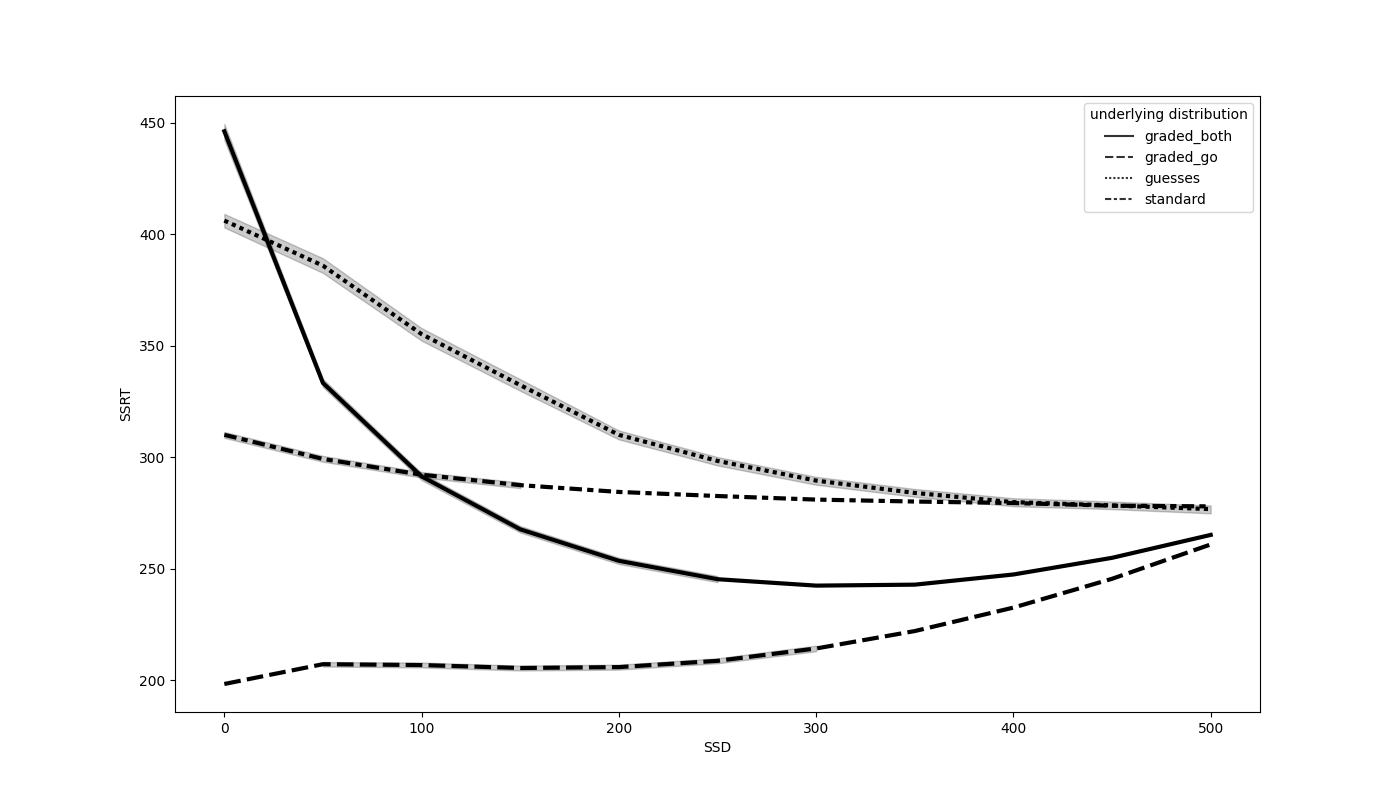

In [2]:
Image('figures/SSRT_by_SSD.png')

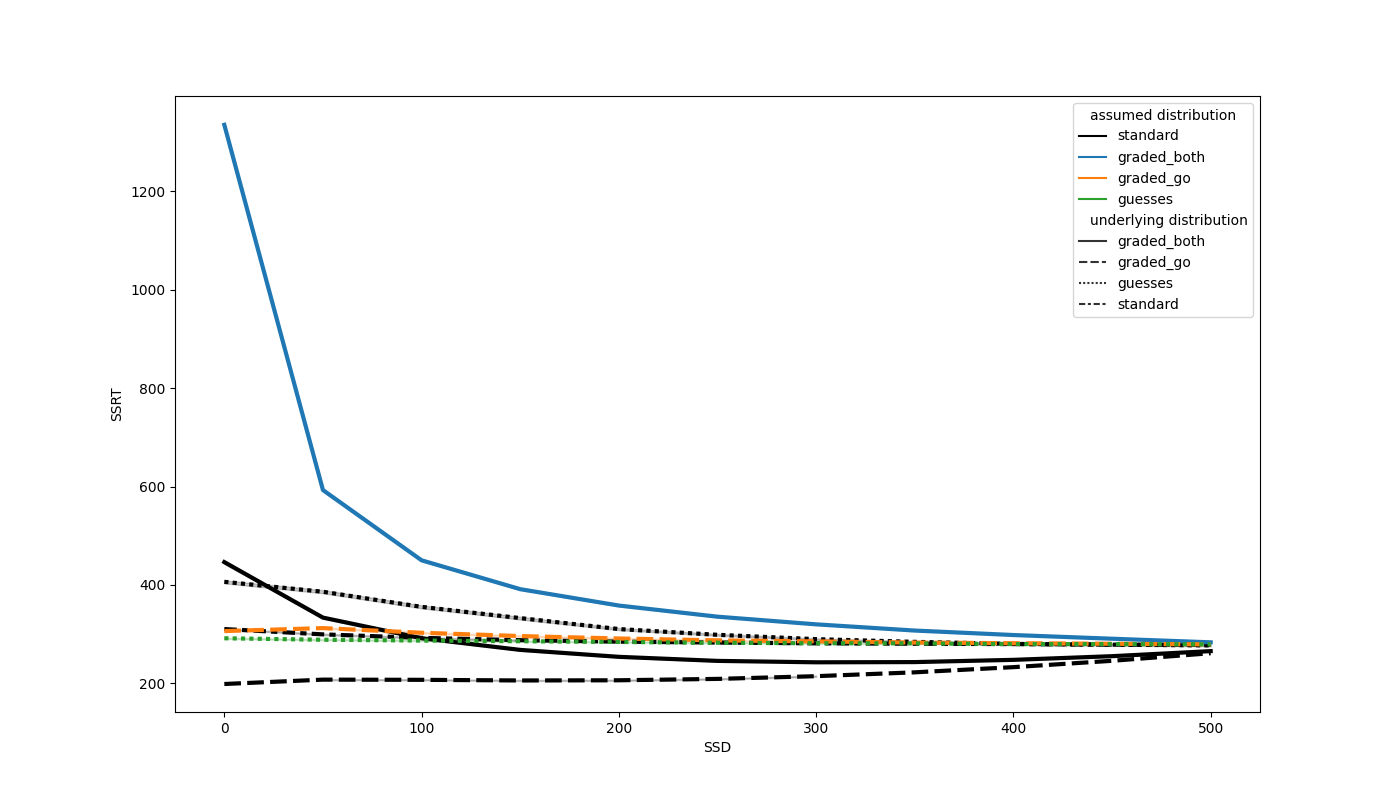

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

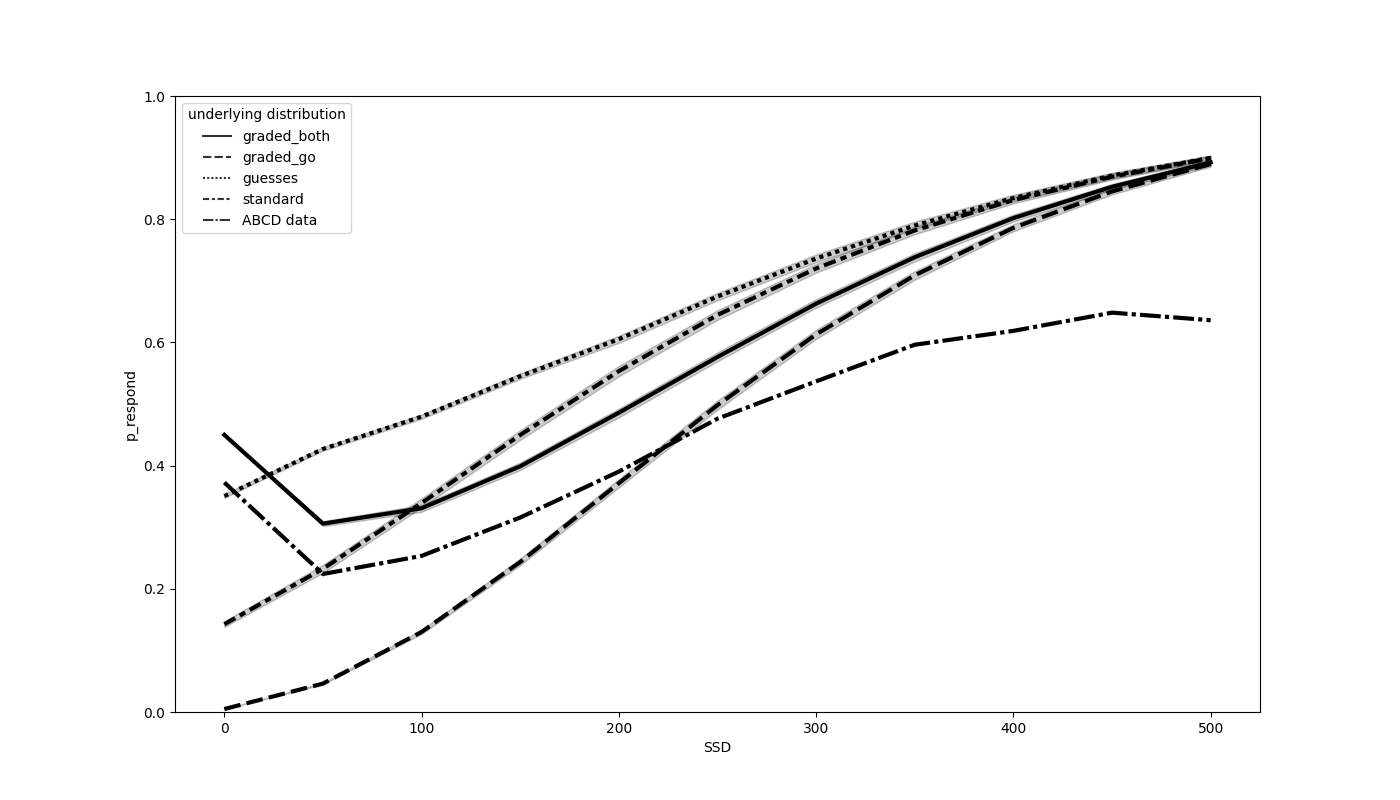

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [6]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [7]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [9]:
monster_df = pd.concat([mus_df.add_prefix('expected_'), sim_rt_info, df], 1, sort=True)

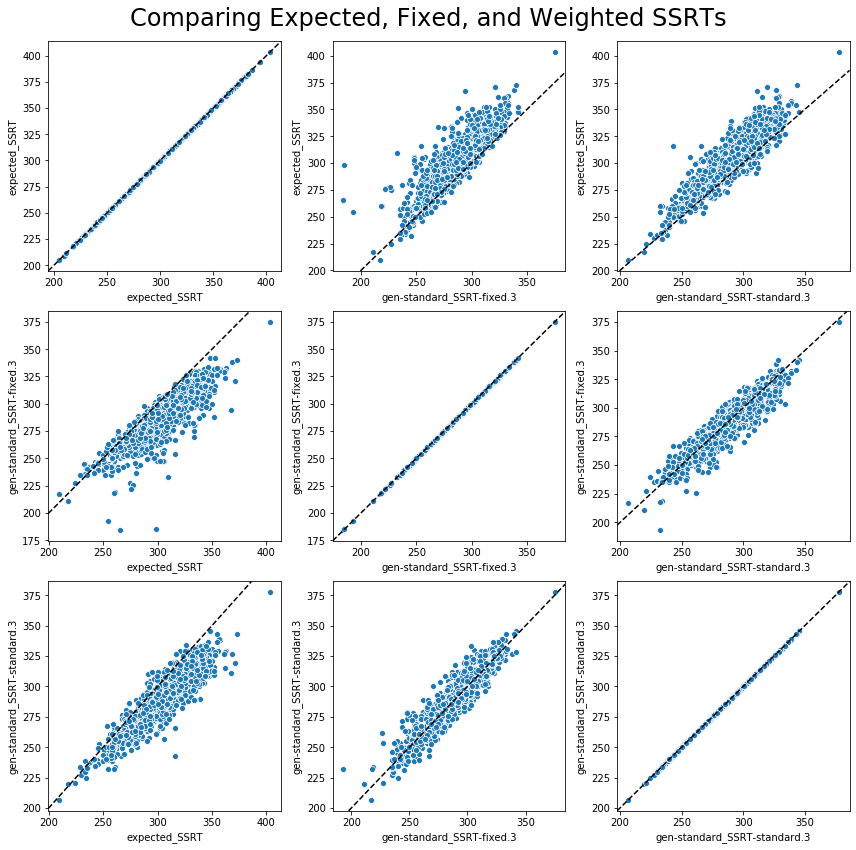

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

columns = ['expected_SSRT', 'gen-standard_SSRT-fixed.3', 'gen-standard_SSRT-standard.3']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Expected, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [11]:
monster_df[columns].corr(method='spearman')

,expected_SSRT,gen-standard_SSRT-fixed.3,gen-standard_SSRT-standard.3
expected_SSRT,1.000000,0.872572,0.899657
gen-standard_SSRT-fixed.3,0.872572,1.000000,0.921174
gen-standard_SSRT-standard.3,0.899657,0.921174,1.000000


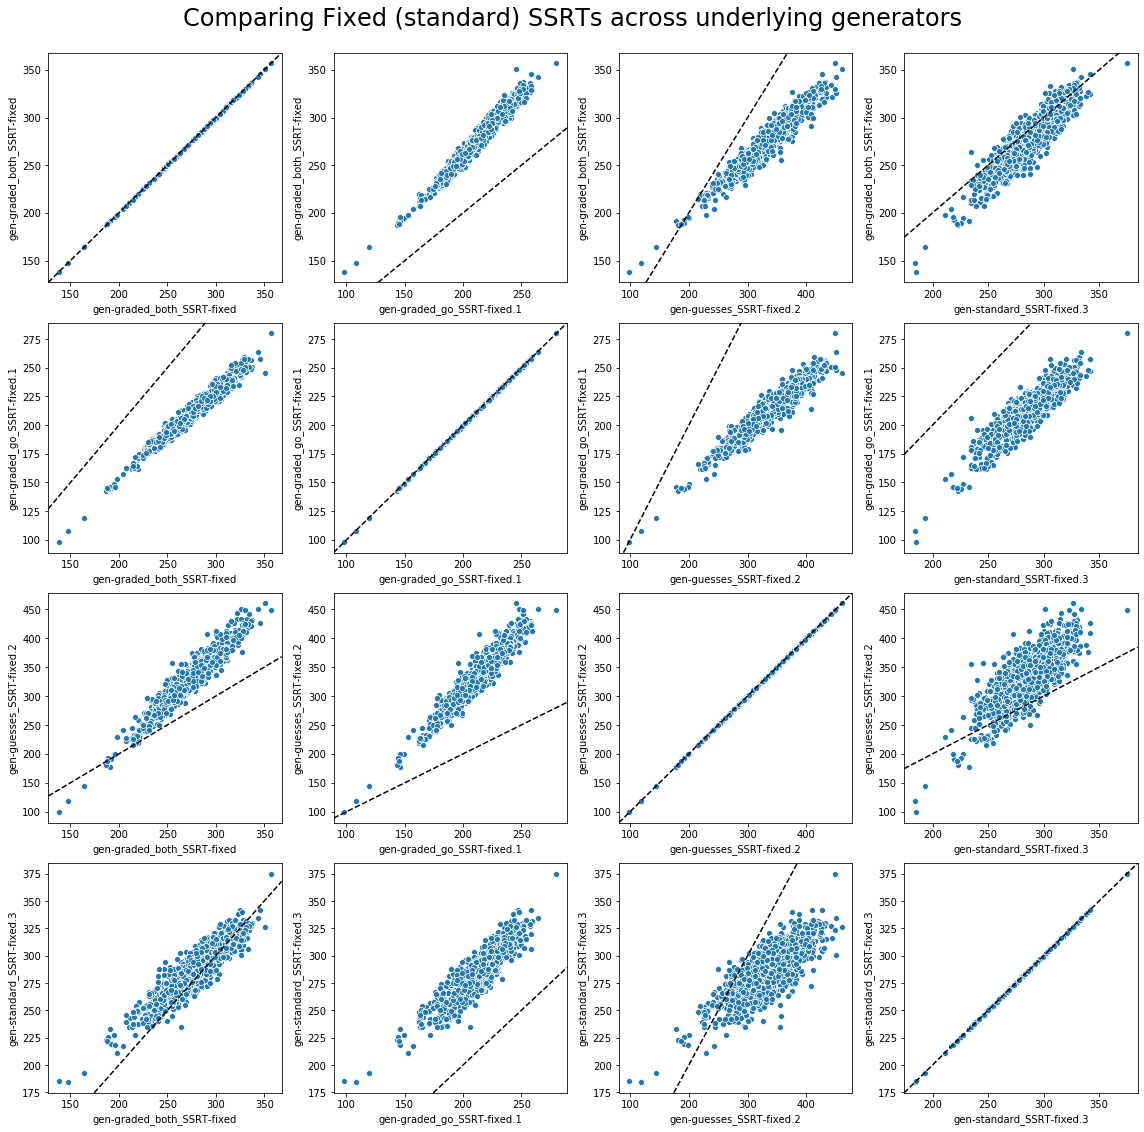

In [12]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [13]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
gen-graded_both_SSRT-fixed,1.000000,0.978639,0.955035,0.893259
gen-graded_go_SSRT-fixed.1,0.978639,1.000000,0.945918,0.898130
gen-guesses_SSRT-fixed.2,0.955035,0.945918,1.000000,0.771371
gen-standard_SSRT-fixed.3,0.893259,0.898130,0.771371,1.000000


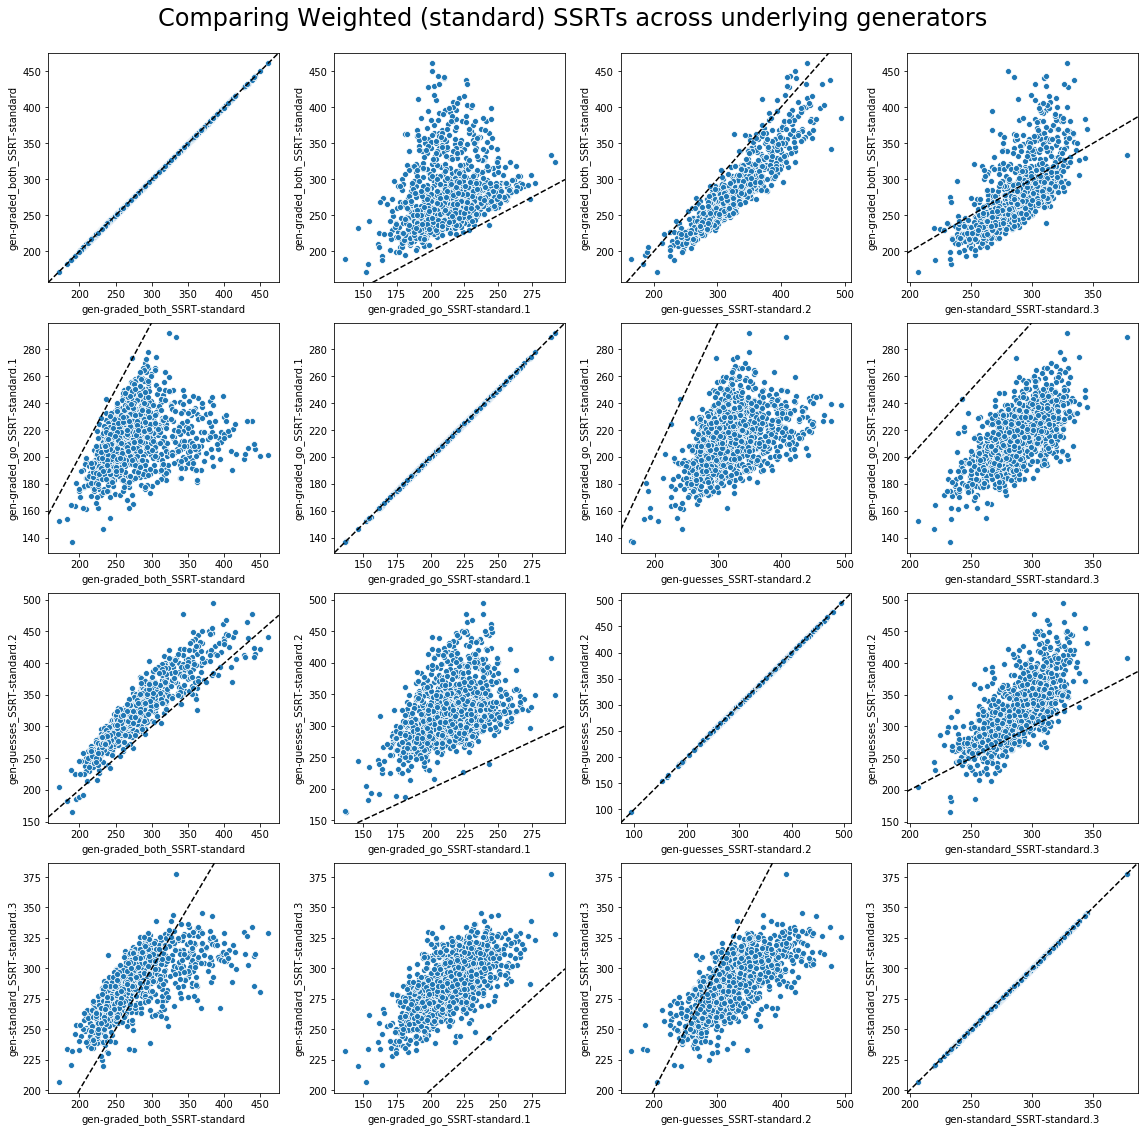

In [14]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [15]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3
gen-graded_both_SSRT-standard,1.000000,0.396102,0.930156,0.751053
gen-graded_go_SSRT-standard.1,0.396102,1.000000,0.457984,0.658054
gen-guesses_SSRT-standard.2,0.930156,0.457984,1.000000,0.729822
gen-standard_SSRT-standard.3,0.751053,0.658054,0.729822,1.000000


In [16]:
main_cols = ['expected_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard.1',
             'gen-guesses_SSRT-standard.2',
             'gen-standard_SSRT-standard.3',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed.1',
             'gen-guesses_SSRT-fixed.2',
             'gen-standard_SSRT-fixed.3']
monster_df[main_cols].describe()

,expected_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
count,8238.000000,1148.000000,1148.000000,1152.000000,1147.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,301.530191,276.776299,214.037879,320.034954,287.021687,276.480035,212.209201,333.220486,285.277778
std,24.909857,43.657923,21.282300,47.686965,22.147877,27.404610,20.382242,45.477178,22.248715
min,204.551478,171.472727,136.616667,94.083333,206.200000,138.000000,98.000000,99.000000,184.000000
25%,285.061545,247.283796,199.042217,288.370833,271.900000,259.000000,199.000000,305.000000,271.000000
50%,301.501834,268.616667,214.130000,313.331034,287.350000,278.000000,214.000000,336.000000,286.000000
75%,318.146195,293.845833,228.401907,346.929167,303.200000,295.000000,226.000000,364.000000,301.000000
max,403.580206,460.866667,291.806452,493.933333,377.766667,357.000000,280.000000,460.000000,375.000000


In [17]:
df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,gen-guesses_SSRT-graded_go.2,gen-standard_SSRT-graded_go.3,gen-graded_both_SSRT-graded_both,gen-graded_go_SSRT-graded_both.1,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
gen-graded_both_SSRT-standard,1.000000,0.396102,0.930156,0.751053,0.505436,-0.452590,0.639724,-0.297861,0.814497,0.712058,0.845530,0.699255,0.814497,0.712058,0.845530,0.699255,0.662995,0.656024,0.617774,0.641110
gen-graded_go_SSRT-standard.1,0.396102,1.000000,0.457984,0.658054,0.369123,0.516353,0.704652,0.297430,-0.069970,0.620187,-0.024706,-0.041177,-0.069970,0.620187,-0.024706,-0.041177,0.848766,0.863140,0.772415,0.847843
gen-guesses_SSRT-standard.2,0.930156,0.457984,1.000000,0.729822,0.288259,-0.447086,0.637621,-0.387974,0.710940,0.675805,0.793776,0.582110,0.710940,0.675805,0.793776,0.582110,0.770772,0.767537,0.772015,0.690815
gen-standard_SSRT-standard.3,0.751053,0.658054,0.729822,1.000000,0.677169,0.024589,0.942917,0.250723,0.540800,0.946952,0.563699,0.644290,0.540800,0.946952,0.563699,0.644290,0.745802,0.756685,0.599140,0.921174
gen-graded_both_SSRT-guesses,0.505436,0.369123,0.288259,0.677169,1.000000,0.196556,0.684779,0.505815,0.422427,0.695230,0.334516,0.584783,0.422427,0.695230,0.334516,0.584783,0.279452,0.280450,0.093537,0.521936
gen-graded_go_SSRT-guesses.1,-0.452590,0.516353,-0.447086,0.024589,0.196556,1.000000,0.176325,0.787152,-0.704690,0.034810,-0.745379,-0.513086,-0.704690,0.034810,-0.745379,-0.513086,0.105031,0.114155,0.006736,0.220975
gen-guesses_SSRT-guesses.2,0.639724,0.704652,0.637621,0.942917,0.684779,0.176325,1.000000,0.385487,0.418541,0.944211,0.441318,0.555878,0.418541,0.944211,0.441318,0.555878,0.726474,0.736292,0.569769,0.908890
gen-standard_SSRT-guesses.3,-0.297861,0.297430,-0.387974,0.250723,0.505815,0.787152,0.385487,1.000000,-0.323001,0.294425,-0.402701,-0.022139,-0.323001,0.294425,-0.402701,-0.022139,-0.034378,-0.021690,-0.216297,0.264299
gen-graded_both_SSRT-graded_go,0.814497,-0.069970,0.710940,0.540800,0.422427,-0.704690,0.418541,-0.323001,1.000000,0.550225,0.973455,0.905387,1.000000,0.550225,0.973455,0.905387,0.238528,0.243205,0.196308,0.297639
gen-graded_go_SSRT-graded_go.1,0.712058,0.620187,0.675805,0.946952,0.695230,0.034810,0.944211,0.294425,0.550225,1.000000,0.567774,0.681383,0.550225,1.000000,0.567774,0.681383,0.678343,0.693422,0.520633,0.863774


# testing a subject to investigate fixed SSD - not finished yet

In [18]:
def generate_out_df_simple(data):
    info = []
    ssrtmodel = SSRTmodel(model='replacement')
    goRTs = data.loc[data.goRT.notnull(), 'goRT'].values
    SSDs = [i for i in data.SSD.unique() if i == i]
    SSDs.sort()

    for SSD in SSDs:
        curr_df = data.query(
            "condition=='go' | (condition=='stop' and SSD == %s)" % SSD
            )
        curr_metrics = ssrtmodel.fit_transform(curr_df)
        curr_info = [v for v in curr_metrics.values()] +\
                    [SSD]
        info.append(curr_info)
        
    cols = [k for k in curr_metrics.keys()] +\
           ['SSD']
    # get for metrics using whole simulated data
    curr_metrics = SSRTmodel(model='replacement').fit_transform(data)
    curr_info = [v for v in curr_metrics.values()] +\
                [-np.inf]
    info.append(curr_info)

    return pd.DataFrame(
        info,
        columns=cols)

In [19]:
simulator_dict = {
    'standard': SimulateData(),
}

ssrtmodel = SSRTmodel(model='replacement')

# set up shared params
SSDs = np.arange(0, 550, 50)
params = {
    'n_trials_stop': 3000,
    'n_trials_go': 10000,
    'SSDs': SSDs,
}

# SIMULATE INDIVIDUALS
issue_subs = []
for sub in monster_df.loc[monster_df['gen-graded_both_SSRT-standard'].notnull(), :].index[9:10]:
    params['mu_go'] = mus_dict[sub]['go']
    params['mu_stop'] = mus_dict[sub]['stop']

    for sim_key in simulator_dict:
        print('mu_stop', params['mu_stop'])
        data = simulator_dict[sim_key].simulate(params)
        print('expected', monster_df.loc[sub, 'expected_SSRT'])
        print('mu_stop', params['mu_stop'])
        print('calculated', ssrtmodel.fit_transform(data)['SSRT'])
        print('*'*40)
        
        
        

mu_stop 0.3564301019152818
expected 330.55991753403737
mu_stop 0.3564301019152818
calculated 273.0
****************************************


In [20]:
ssrt_by_ssd_df = generate_out_df_simple(data)
ssrt_by_ssd_df

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD
0,338.0,0.0,0.178667,2093.0,504.0262,319.593284,0,0.0,NaN,NaN,0.0
1,322.0,50.0,0.260667,2093.0,504.0262,336.897698,0,0.0,NaN,NaN,50.0
2,319.0,100.0,0.386667,2093.0,504.0262,354.837069,0,0.0,NaN,NaN,100.0
3,309.0,150.0,0.482667,2093.0,504.0262,375.982044,0,0.0,NaN,NaN,150.0
4,307.0,200.0,0.586333,2093.0,504.0262,390.198408,0,0.0,NaN,NaN,200.0
5,307.0,250.0,0.681667,2093.0,504.0262,409.126161,0,0.0,NaN,NaN,250.0
6,309.0,300.0,0.760333,2093.0,504.0262,420.718106,0,0.0,NaN,NaN,300.0
7,288.0,350.0,0.796667,2093.0,504.0262,440.715481,0,0.0,NaN,NaN,350.0
8,285.0,400.0,0.848333,2093.0,504.0262,450.660904,0,0.0,NaN,NaN,400.0
9,281.0,450.0,0.880667,2093.0,504.0262,455.888721,0,0.0,NaN,NaN,450.0


In [24]:
generate_out_df_simple(data.loc[data.SSD.isin(np.arange(50, 300, 50)) | (data.condition=='go')])

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD
0,322.0,50.0,0.260667,2093.0,504.0262,336.897698,0,0.0,NaN,NaN,50.0
1,319.0,100.0,0.386667,2093.0,504.0262,354.837069,0,0.0,NaN,NaN,100.0
2,309.0,150.0,0.482667,2093.0,504.0262,375.982044,0,0.0,NaN,NaN,150.0
3,307.0,200.0,0.586333,2093.0,504.0262,390.198408,0,0.0,NaN,NaN,200.0
4,307.0,250.0,0.681667,2093.0,504.0262,409.126161,0,0.0,NaN,NaN,250.0
5,308.0,150.0,0.479600,2093.0,504.0262,381.221713,0,0.0,NaN,NaN,-inf


# Plot graded Mu Go function

In [22]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:285: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


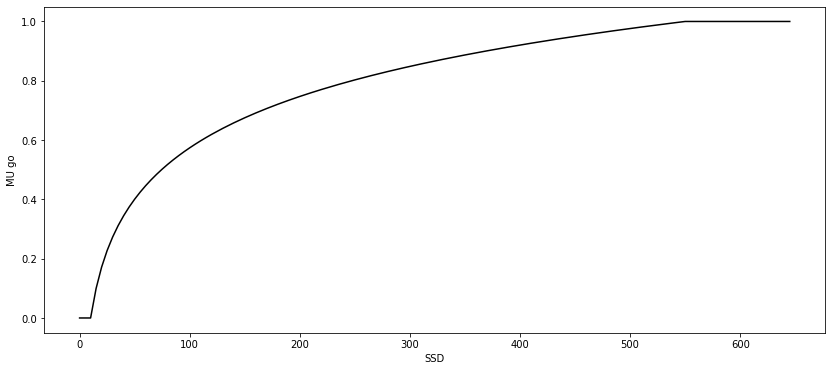

In [23]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')